In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os 
if 'notebooks' in os.getcwd():
    os.chdir('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Feature extraction 

In [3]:
X = pd.read_csv("data/X_train_YG7NZSq.csv", index_col=0)
X.columns.name = 'date'
X.head()

date,0,1,2,3,4,5,6,7,8,9,...,744,745,746,747,748,749,750,751,752,753
stocksID,,,,,,,,,,,,,,,,,,,,,
0,-0.018647,-0.013002,-0.010776,-0.016676,-0.005110,0.009092,-0.011745,0.007120,-0.008451,0.009119,...,-0.012525,-0.011716,0.003532,0.009965,0.018142,-0.001236,-0.002732,0.013074,-0.005843,-0.003823
1,-0.008254,-0.022280,0.012173,-0.006820,-0.004055,0.012912,-0.001293,0.009994,-0.002747,0.001664,...,0.014432,-0.002255,-0.011493,0.002291,-0.001346,-0.004026,-0.004672,-0.002889,-0.004984,0.005005
2,-0.008404,-0.013629,-0.006044,-0.003425,-0.009522,-0.001353,-0.000637,0.007640,0.001600,0.007416,...,-0.006245,-0.001329,0.005230,0.003510,0.006022,-0.000343,0.001757,0.004972,0.004916,-0.007338
3,-0.022734,-0.006981,-0.008568,-0.010899,-0.017981,0.002485,-0.011980,0.012446,-0.010636,0.003807,...,-0.005179,-0.003442,0.002733,0.013369,0.019738,0.001201,-0.003669,0.008690,0.000272,-0.008150
4,-0.024546,-0.008315,-0.007991,-0.003515,0.007872,0.007082,-0.004614,-0.008182,-0.005255,0.014404,...,-0.017507,-0.001233,-0.000552,0.004664,0.005202,0.007695,0.003775,0.005097,0.001135,-0.009262


In [4]:
X = X.transpose()
X.head()

stocksID,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,,,,,,,,,,,,
0,-0.018647,-0.008254,-0.008404,-0.022734,-0.024546,-0.019243,0.000083,-0.015313,-0.001305,-0.020038,...,0.054454,0.031896,-0.008109,0.033008,-0.003656,0.008359,0.012350,-0.006184,0.017914,-0.022667
1,-0.013002,-0.022280,-0.013629,-0.006981,-0.008315,-0.004789,-0.006233,-0.014736,-0.004197,-0.012818,...,-0.009958,0.020950,-0.001532,0.026261,-0.005213,-0.002016,0.016356,-0.011337,0.011649,-0.012398
2,-0.010776,0.012173,-0.006044,-0.008568,-0.007991,-0.004691,-0.009110,-0.000887,-0.019816,-0.013035,...,0.003228,0.005186,0.000809,0.010101,0.005318,0.028789,0.006280,-0.010917,-0.006168,0.000730
3,-0.016676,-0.006820,-0.003425,-0.010899,-0.003515,0.002805,0.054403,-0.007216,-0.005595,-0.006182,...,-0.002271,0.038125,-0.000351,0.012020,0.006399,-0.002400,-0.001466,0.005750,0.028425,0.007258
4,-0.005110,-0.004055,-0.009522,-0.017981,0.007872,-0.006069,-0.012260,-0.002479,0.008634,-0.022030,...,-0.030167,0.005030,-0.014674,-0.006336,-0.002130,-0.056018,0.003624,-0.013155,-0.010859,-0.005218


In [5]:
new_columns_name = X.columns\
    .get_level_values("stocksID")\
    .map(lambda x: f'company_{x}')

In [6]:
X.rename(
    lambda stock_id: f'company_{stock_id}',
    axis = 1,
    inplace = True
)

In [7]:
X

stocksID,company_0,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,company_9,...,company_40,company_41,company_42,company_43,company_44,company_45,company_46,company_47,company_48,company_49
date,,,,,,,,,,,,,,,,,,,,,
0,-0.018647,-0.008254,-0.008404,-0.022734,-0.024546,-0.019243,0.000083,-0.015313,-0.001305,-0.020038,...,0.054454,0.031896,-0.008109,0.033008,-0.003656,0.008359,0.012350,-0.006184,0.017914,-0.022667
1,-0.013002,-0.022280,-0.013629,-0.006981,-0.008315,-0.004789,-0.006233,-0.014736,-0.004197,-0.012818,...,-0.009958,0.020950,-0.001532,0.026261,-0.005213,-0.002016,0.016356,-0.011337,0.011649,-0.012398
2,-0.010776,0.012173,-0.006044,-0.008568,-0.007991,-0.004691,-0.009110,-0.000887,-0.019816,-0.013035,...,0.003228,0.005186,0.000809,0.010101,0.005318,0.028789,0.006280,-0.010917,-0.006168,0.000730
3,-0.016676,-0.006820,-0.003425,-0.010899,-0.003515,0.002805,0.054403,-0.007216,-0.005595,-0.006182,...,-0.002271,0.038125,-0.000351,0.012020,0.006399,-0.002400,-0.001466,0.005750,0.028425,0.007258
4,-0.005110,-0.004055,-0.009522,-0.017981,0.007872,-0.006069,-0.012260,-0.002479,0.008634,-0.022030,...,-0.030167,0.005030,-0.014674,-0.006336,-0.002130,-0.056018,0.003624,-0.013155,-0.010859,-0.005218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,-0.001236,-0.004026,-0.000343,0.001201,0.007695,0.007474,-0.006070,0.000125,0.002379,0.000802,...,0.000109,-0.006120,0.000421,-0.003802,-0.001963,-0.023981,-0.004295,-0.008224,0.001535,-0.001814
750,-0.002732,-0.004672,0.001757,-0.003669,0.003775,-0.002425,0.000114,-0.009989,0.001253,0.002215,...,0.004044,0.015217,0.004890,0.034763,-0.000907,0.012294,0.005138,-0.007828,0.001903,-0.007145
751,0.013074,-0.002889,0.004972,0.008690,0.005097,0.003741,0.004040,0.000157,-0.003839,0.006829,...,0.006168,0.003466,-0.001115,-0.005417,-0.000509,-0.001861,0.003698,0.006122,0.001956,-0.002696


In [8]:
X.to_parquet(
    "data/raw_data.parquet"
)


This dataframe will be used in order to obtain the features 


In [9]:
X

stocksID,company_0,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,company_9,...,company_40,company_41,company_42,company_43,company_44,company_45,company_46,company_47,company_48,company_49
date,,,,,,,,,,,,,,,,,,,,,
0,-0.018647,-0.008254,-0.008404,-0.022734,-0.024546,-0.019243,0.000083,-0.015313,-0.001305,-0.020038,...,0.054454,0.031896,-0.008109,0.033008,-0.003656,0.008359,0.012350,-0.006184,0.017914,-0.022667
1,-0.013002,-0.022280,-0.013629,-0.006981,-0.008315,-0.004789,-0.006233,-0.014736,-0.004197,-0.012818,...,-0.009958,0.020950,-0.001532,0.026261,-0.005213,-0.002016,0.016356,-0.011337,0.011649,-0.012398
2,-0.010776,0.012173,-0.006044,-0.008568,-0.007991,-0.004691,-0.009110,-0.000887,-0.019816,-0.013035,...,0.003228,0.005186,0.000809,0.010101,0.005318,0.028789,0.006280,-0.010917,-0.006168,0.000730
3,-0.016676,-0.006820,-0.003425,-0.010899,-0.003515,0.002805,0.054403,-0.007216,-0.005595,-0.006182,...,-0.002271,0.038125,-0.000351,0.012020,0.006399,-0.002400,-0.001466,0.005750,0.028425,0.007258
4,-0.005110,-0.004055,-0.009522,-0.017981,0.007872,-0.006069,-0.012260,-0.002479,0.008634,-0.022030,...,-0.030167,0.005030,-0.014674,-0.006336,-0.002130,-0.056018,0.003624,-0.013155,-0.010859,-0.005218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,-0.001236,-0.004026,-0.000343,0.001201,0.007695,0.007474,-0.006070,0.000125,0.002379,0.000802,...,0.000109,-0.006120,0.000421,-0.003802,-0.001963,-0.023981,-0.004295,-0.008224,0.001535,-0.001814
750,-0.002732,-0.004672,0.001757,-0.003669,0.003775,-0.002425,0.000114,-0.009989,0.001253,0.002215,...,0.004044,0.015217,0.004890,0.034763,-0.000907,0.012294,0.005138,-0.007828,0.001903,-0.007145
751,0.013074,-0.002889,0.004972,0.008690,0.005097,0.003741,0.004040,0.000157,-0.003839,0.006829,...,0.006168,0.003466,-0.001115,-0.005417,-0.000509,-0.001861,0.003698,0.006122,0.001956,-0.002696


# 1. Momentum

<AxesSubplot:xlabel='date'>

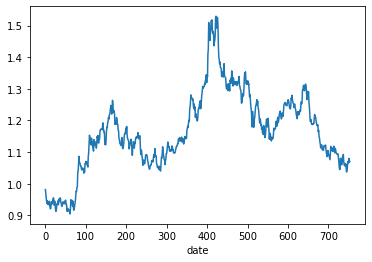

In [11]:
X['company_0'].add(1).cumprod().plot()

In [13]:
company_0_returns = X['company_0']

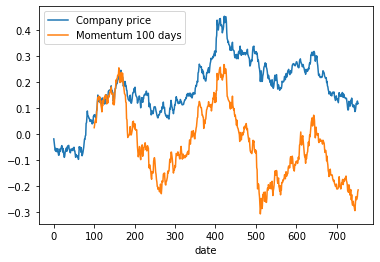

In [33]:
lookback_window = 100
momentum = company_0_returns\
    .subtract(company_0_returns.shift(lookback_window))\

company_0_returns\
    .cumsum()\
    .plot(
        label = "Company price"
    )

momentum.cumsum()\
    .plot(
        label = f"Momentum {lookback_window} days"
    )

plt.legend()


In [31]:
company_0_returns.corr(momentum)

0.720404217502547

# Mean returns

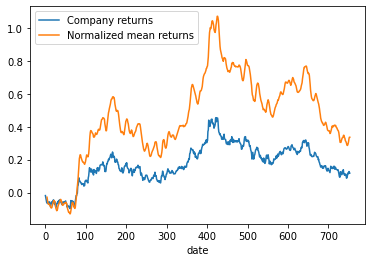

In [38]:
normalized_mean_returns = company_0_returns\
    .rolling(5)\
    .sum()\
    .divide(np.sqrt(5))

company_0_returns\
    .cumsum()\
    .plot(
        label="Company returns"
    )

normalized_mean_returns\
    .cumsum()\
    .plot(
        label = "Normalized mean returns"
    )

plt.legend()

In [39]:
company_0_returns.corr(normalized_mean_returns)

0.4628336927487721

# Fitting features

In [47]:
X_train = pd.read_csv('data/X_train_YG7NZSq.csv', index_col=0)
X_train.columns.name = 'date'

In [48]:
X_train_reshape = pd\
    .concat([ X_train.T.shift(i+1).stack(dropna=False) for i in range(250) ], 1)\
    .dropna()
X_train_reshape.columns = pd.Index(range(1,251), name='timeLag')

C:\Users\User\AppData\Local\Temp\ipykernel_19244\2681097046.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X_train_reshape = pd\


In [49]:
X_train_reshape

timeLag             1         2         3         4         5         6    \
date stocksID                                                               
250  0         0.000103  0.012387  0.011243  0.002595 -0.008509 -0.002711   
     1        -0.000982  0.003932  0.000050  0.001616 -0.003902 -0.001686   
     2         0.009301  0.003914  0.004995  0.001539  0.001452  0.002809   
     3         0.006515 -0.006553  0.009464  0.005204  0.004227 -0.005438   
     4        -0.006223  0.005415  0.014643  0.005195  0.004489  0.002695   
...                 ...       ...       ...       ...       ...       ...   
753  45        0.009786 -0.001861  0.012294 -0.023981  0.004069  0.000148   
     46       -0.008842  0.003698  0.005138 -0.004295 -0.010509  0.010230   
     47       -0.008607  0.006122 -0.007828 -0.008224  0.011357 -0.012855   
     48       -0.007519  0.001956  0.001903  0.001535  0.000695  0.004107   
     49       -0.002816 -0.002696 -0.007145 -0.001814  0.004331  0.005457   

timeLag             7         8         9         10   ...       241  \
date stocksID                                          ...             
250  0         0.008934  0.006571 -0.018546 -0.008353  ...  0.009119   
     1         0.008810  0.001585 -0.000745 -0.002155  ...  0.001664   
     2         0.005177 -0.006942 -0.013340 -0.008071  ...  0.007416   
     3         0.008861  0.004025 -0.012432 -0.006100  ...  0.003807   
     4         0.007609  0.011437 -0.004804  0.039274  ...  0.014404   
...                 ...       ...       ...       ...  ...       ...   
753  45       -0.062300  0.040002 -0.003475 -0.016284  ...  0.003808   
     46        0.006846  0.017514 -0.010796 -0.026356  ... -0.012077   
     47        0.000346 -0.016681  0.008247 -0.002723  ...  0.007291   
     48       -0.011879  0.000526  0.003178 -0.010654  ...  0.010960   
     49        0.000633 -0.005819  0.007592 -0.002003  ... -0.024003   

timeLag             242       243       244       245       246       247  \
date stocksID                                                               
250  0        -0.008451  0.007120 -0.011745  0.009092 -0.005110 -0.016676   
     1        -0.002747  0.009994 -0.001293  0.012912 -0.004055 -0.006820   
     2         0.001600  0.007640 -0.000637 -0.001353 -0.009522 -0.003425   
     3        -0.010636  0.012446 -0.011980  0.002485 -0.017981 -0.010899   
     4        -0.005255 -0.008182 -0.004614  0.007082  0.007872 -0.003515   
...                 ...       ...       ...       ...       ...       ...   
753  45       -0.003027  0.002522 -0.006594 -0.000489  0.054751 -0.012180   
     46       -0.002215  0.027569  0.021476  0.003874 -0.001690  0.012346   
     47        0.000369  0.000962 -0.005902  0.001067  0.013055  0.015432   
     48       -0.012003 -0.001969  0.030976 -0.000712  0.009795 -0.006842   
     49        0.001416  0.003348 -0.003685 -0.002267 -0.006733  0.000575   

timeLag             248       249       250  
date stocksID                                
250  0        -0.010776 -0.013002 -0.018647  
     1         0.012173 -0.022280 -0.008254  
     2        -0.006044 -0.013629 -0.008404  
     3        -0.008568 -0.006981 -0.022734  
     4        -0.007991 -0.008315 -0.024546  
...                 ...       ...       ...  
753  45        0.019142 -0.023184 -0.001315  
     46        0.007502  0.011425 -0.001580  
     47        0.023533 -0.022811 -0.001053  
     48        0.000464  0.015894 -0.003321  
     49        0.000735 -0.020917 -0.004808  

[25200 rows x 250 columns]

In [42]:
A = pd.DataFrame(np.zeros([250, 10]))
A

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
X_train_reshape

timeLag             1         2         3         4         5         6    \
date stocksID                                                               
250  0         0.000103  0.012387  0.011243  0.002595 -0.008509 -0.002711   
     1        -0.000982  0.003932  0.000050  0.001616 -0.003902 -0.001686   
     2         0.009301  0.003914  0.004995  0.001539  0.001452  0.002809   
     3         0.006515 -0.006553  0.009464  0.005204  0.004227 -0.005438   
     4        -0.006223  0.005415  0.014643  0.005195  0.004489  0.002695   
...                 ...       ...       ...       ...       ...       ...   
753  45        0.009786 -0.001861  0.012294 -0.023981  0.004069  0.000148   
     46       -0.008842  0.003698  0.005138 -0.004295 -0.010509  0.010230   
     47       -0.008607  0.006122 -0.007828 -0.008224  0.011357 -0.012855   
     48       -0.007519  0.001956  0.001903  0.001535  0.000695  0.004107   
     49       -0.002816 -0.002696 -0.007145 -0.001814  0.004331  0.005457   

timeLag             7         8         9         10   ...       241  \
date stocksID                                          ...             
250  0         0.008934  0.006571 -0.018546 -0.008353  ...  0.009119   
     1         0.008810  0.001585 -0.000745 -0.002155  ...  0.001664   
     2         0.005177 -0.006942 -0.013340 -0.008071  ...  0.007416   
     3         0.008861  0.004025 -0.012432 -0.006100  ...  0.003807   
     4         0.007609  0.011437 -0.004804  0.039274  ...  0.014404   
...                 ...       ...       ...       ...  ...       ...   
753  45       -0.062300  0.040002 -0.003475 -0.016284  ...  0.003808   
     46        0.006846  0.017514 -0.010796 -0.026356  ... -0.012077   
     47        0.000346 -0.016681  0.008247 -0.002723  ...  0.007291   
     48       -0.011879  0.000526  0.003178 -0.010654  ...  0.010960   
     49        0.000633 -0.005819  0.007592 -0.002003  ... -0.024003   

timeLag             242       243       244       245       246       247  \
date stocksID                                                               
250  0        -0.008451  0.007120 -0.011745  0.009092 -0.005110 -0.016676   
     1        -0.002747  0.009994 -0.001293  0.012912 -0.004055 -0.006820   
     2         0.001600  0.007640 -0.000637 -0.001353 -0.009522 -0.003425   
     3        -0.010636  0.012446 -0.011980  0.002485 -0.017981 -0.010899   
     4        -0.005255 -0.008182 -0.004614  0.007082  0.007872 -0.003515   
...                 ...       ...       ...       ...       ...       ...   
753  45       -0.003027  0.002522 -0.006594 -0.000489  0.054751 -0.012180   
     46       -0.002215  0.027569  0.021476  0.003874 -0.001690  0.012346   
     47        0.000369  0.000962 -0.005902  0.001067  0.013055  0.015432   
     48       -0.012003 -0.001969  0.030976 -0.000712  0.009795 -0.006842   
     49        0.001416  0.003348 -0.003685 -0.002267 -0.006733  0.000575   

timeLag             248       249       250  
date stocksID                                
250  0        -0.010776 -0.013002 -0.018647  
     1         0.012173 -0.022280 -0.008254  
     2        -0.006044 -0.013629 -0.008404  
     3        -0.008568 -0.006981 -0.022734  
     4        -0.007991 -0.008315 -0.024546  
...                 ...       ...       ...  
753  45        0.019142 -0.023184 -0.001315  
     46        0.007502  0.011425 -0.001580  
     47        0.023533 -0.022811 -0.001053  
     48        0.000464  0.015894 -0.003321  
     49        0.000735 -0.020917 -0.004808  

[25200 rows x 250 columns]

In [55]:
X_train_reshape.shape, A.shape

((25200, 250), (250, 10))

In [57]:
features_df = X_train_reshape @ A.to_numpy()

In [58]:
features_df

0    1    2    3    4    5    6    7    8    9
date stocksID                                                  
250  0         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
     1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
     2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
     3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
     4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
753  45        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
     46        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
     47        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
     48        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
     49        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[25200 rows x 10 columns]